In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データセットの生成
X, y = make_classification(
    n_samples=300,      # サンプル数
    n_features=5,          # 特徴量の数
    n_informative=3,     #  識別的特徴量の次元数
    n_redundant=2,       # n_informative の線形和で表せる特徴量の数
    n_classes=3,            # クラスラベルの数
    n_clusters_per_class=1, 
    random_state=0,     # 乱数シード
    shuffle=False)

# train, test に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# モデル作成
clf = RandomForestClassifier(
    n_estimators =10,   # 木の数
    criterion='gini',          # ノード分割規則 gini/entropy
    max_depth=2,         # 木の最大深さ
    random_state=0     # 乱数シード
) 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

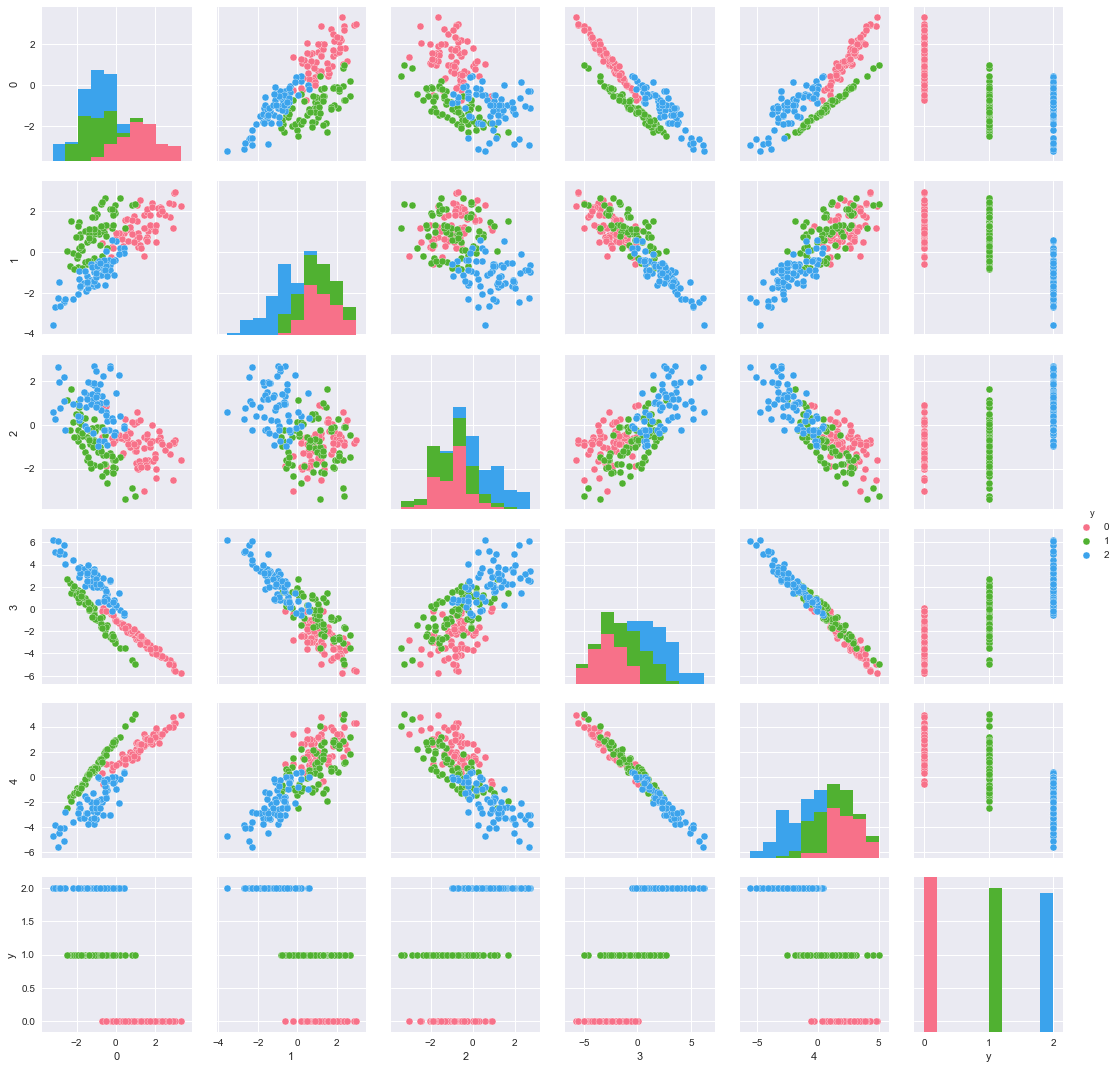

In [3]:
# 各特徴量で散布図作成
dfX = pd.DataFrame(X_train)
dfXy = dfX.assign(y = y_train)
sns.pairplot(dfXy, hue='y', palette='husl');

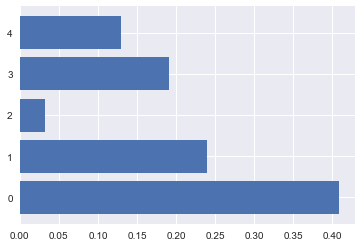

In [4]:
# インポータンス
plt.barh(dfXy.columns[:-1], clf.feature_importances_)
plt.show()

In [5]:
# 予測精度検証
y_pred = clf.predict(X_test)

# 混同行列
print(confusion_matrix(y_test, y_pred))

# 正解率
print(accuracy_score(y_test, y_pred))

# 精度
print(precision_score(y_test, y_pred, average='macro'))

# 検出率
print(recall_score(y_test, y_pred, average='macro'))

#  F1スコア
print(f1_score(y_test, y_pred, average='macro'))

[[23  5  0]
 [ 2 25  7]
 [ 3  3 31]]
0.797979797979798
0.7982646008961799
0.7981868423044894
0.798121298270552
